In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e3/sample_submission.csv
/kaggle/input/playground-series-s3e3/train.csv
/kaggle/input/playground-series-s3e3/test.csv


In [2]:
#Importando os CSVs
sample_submissiom = pd.read_csv("/kaggle/input/playground-series-s3e3/sample_submission.csv")
train = pd.read_csv("/kaggle/input/playground-series-s3e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e3/test.csv")

# Visão Geral dos Dados

In [3]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [4]:
train.shape

(1677, 35)

In [5]:
train.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [6]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


0    1477
1     200
Name: Attrition, dtype: int64


Text(0, 0.5, 'Contagem')

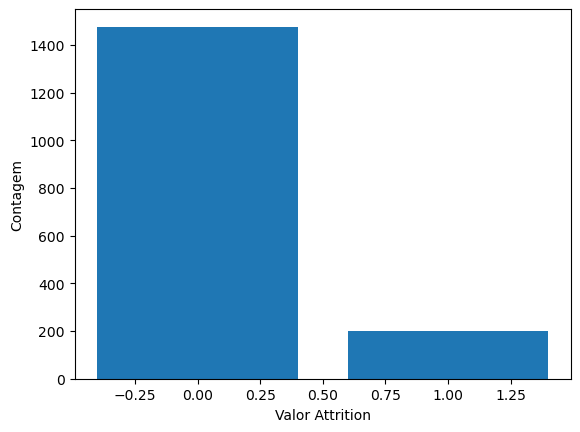

In [7]:
#As classes não estão balanceadas
counts = (train['Attrition'].value_counts())
print(counts)

plt.bar(counts.index, counts.values)
plt.xlabel("Valor Attrition")
plt.ylabel("Contagem")

Random under-sampling:
0    200
1    200
Name: Attrition, dtype: int64


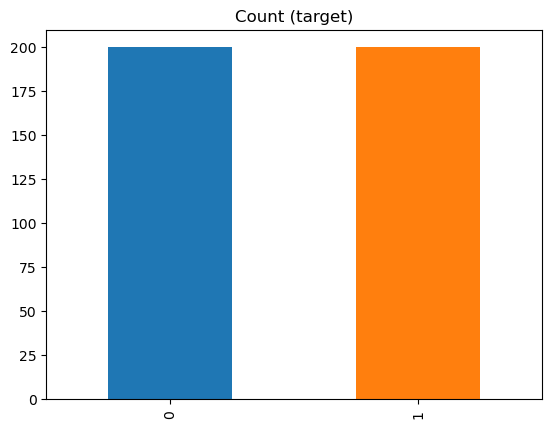

In [8]:
#Balanceando as classes por undersampling
count_class_0, count_class_1 = train.Attrition.value_counts()
df_class_0 = train[train['Attrition'] == 0]
df_class_1 = train[train['Attrition'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
train_undersampling = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(train_undersampling.Attrition.value_counts())
train_undersampling.Attrition.value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

In [9]:
#Existem alguns colunas com dados não numéricos, do tipo 'object'
train.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [10]:
#Transformando os valores categóricos em colunas binárias
one_hot_encoded_train_undersampling = pd.get_dummies(train_undersampling)
one_hot_encoded_test = pd.get_dummies(test)


In [11]:
#Verificando se funcionou para o treino
one_hot_encoded_train_undersampling.dtypes

id                                   int64
Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

In [12]:
#Verificando se funcionou para o teste
one_hot_encoded_test.dtypes

id                                   int64
Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

# Preparação para os modelos

In [13]:
X = one_hot_encoded_train_undersampling.drop(['Attrition', 'id'], axis =1)
y = one_hot_encoded_train_undersampling.Attrition

atributos_test = one_hot_encoded_test.drop(['id'], axis=1)

In [14]:
X = X.values
y = y.values
atributos_test = atributos_test.values

In [15]:
scaler = StandardScaler()
scaler.fit(X)
abtributos = scaler.transform(X)
atributos_test = scaler.transform(atributos_test)

In [16]:
X_train, X_test, y_train, y_test =   train_test_split(X, y, random_state = 52)


In [17]:
print("dados de treino", X_train.shape, y_train.shape)
print("dados de teste", X_test.shape, y_test.shape)

dados de treino (300, 54) (300,)
dados de teste (100, 54) (100,)


# Modelos

*Modelo Bayesiano*

In [18]:
modelo_1 = GaussianNB()
modelo_1.fit(X_train, y_train.ravel())
nb_predict_train = modelo_1.predict(X_train)
modelo_1.fit(X_train, y_train.ravel())
ac_nb_train = sklearn.metrics.accuracy_score(y_train, nb_predict_train)
print("Acurácia treino:", ac_nb_train)
nb_predict_test = modelo_1.predict(X_test)
ac_nb_test = sklearn.metrics.accuracy_score(y_test, nb_predict_test)
print("Acurácia teste: ", ac_nb_test)
print("Classificador Report")
print(sklearn.metrics.classification_report(y_test, nb_predict_test))

Acurácia treino: 0.74
Acurácia teste:  0.75
Classificador Report
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        52
           1       0.69      0.85      0.77        48

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



*Random Forest*

In [19]:
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_train, y_train)
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_train, y_train.ravel())
rf_predict_train = modelo_2.predict(X_train)
ac_rf_train = sklearn.metrics.accuracy_score(y_train, rf_predict_train)
print("Acurácia treino:", ac_rf_train)
rf_predict_test = modelo_2.predict(X_test)
ac_rf_test = sklearn.metrics.accuracy_score(y_test, rf_predict_test)
print("Acurácia teste:", ac_rf_test)
print("Classification Report")
print(sklearn.metrics.classification_report\
      (y_test, rf_predict_test, labels = [1, 0]))

Acurácia treino: 1.0
Acurácia teste: 0.7
Classification Report
              precision    recall  f1-score   support

           1       0.68      0.71      0.69        48
           0       0.72      0.69      0.71        52

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



# Conclusão

Random Forest é o melhor modelo

# Submissão

In [20]:
test_predictions = modelo_2.predict_proba(atributos_test)[:,1]
submit = pd.read_csv('/kaggle/input/playground-series-s3e3/sample_submission.csv')
submit.Attrition = test_predictions
submit.to_csv('submissionb2.csv', index=False)

# Nota Kaggle

**Score privado:** 0.76

**Score público:** 0.75